# <font color='4361ee'> Notebook 1 - Data Exploration #

In this notebook, we explore the dataset provided by Nata Visionaries to understand the main variables that may affect the quality of a Pastel de Nata. We aim to identify data types, detect missing values, visualize feature distributions, and gain insights for later preprocessing and modeling.

**Step 1**: Import all the needed libraries.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Step 2**: Load the *learn.csv* dataset. 
A brief analysis of the dataset reveals that it already includes an `id` column, so this column will be used as the `learn` DataFrame index.

In [16]:
learn = pd.read_csv("Nata_Files/learn.csv", index_col = 0)
learn.head()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,Lisboa,306.0,NaN,245.0,41.73,11.6,4.0,KO
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,Porto,121.0,NaN,186.0,75.10,20.3,7.5,OK
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,Lisboa,357.0,Pastel de Nata,186.0,46.41,73.3,4.2,OK
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,Lisboa,202.0,Pastel de nata,218.0,56.52,80.1,6.0,KO


**Step 3**: Examine the dataset with the `info()` method. This method provides information about the `learn` DataFrame, containing the shape of the dataset (number of entries/rows and number of columns), the data type of each variable and how many non-null values there are per column, among other information.

In [17]:
learn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1 to 5200
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_humidity   5182 non-null   float64
 1   baking_duration    5199 non-null   float64
 2   cooling_period     5199 non-null   float64
 3   cream_fat_content  5176 non-null   float64
 4   egg_temperature    5176 non-null   float64
 5   egg_yolk_count     5176 non-null   float64
 6   final_temperature  5175 non-null   float64
 7   lemon_zest_ph      5174 non-null   float64
 8   notes_baker        0 non-null      float64
 9   origin             5039 non-null   object 
 10  oven_temperature   5179 non-null   float64
 11  pastry_type        3411 non-null   object 
 12  preheating_time    5181 non-null   float64
 13  salt_ratio         5187 non-null   float64
 14  sugar_content      5178 non-null   float64
 15  vanilla_extract    5182 non-null   float64
 16  quality_class      5199 non-n

The dataset has **5200 rows** and **17 columns**. While the number of missing values per column can be calculated with the `info()` method, the following code computes the exact number of NaN's per column.

In [18]:
learn.isnull().sum().sort_values(ascending = False)

notes_baker          5200
pastry_type          1789
origin                161
lemon_zest_ph          26
final_temperature      25
cream_fat_content      24
egg_temperature        24
egg_yolk_count         24
sugar_content          22
oven_temperature       21
preheating_time        19
vanilla_extract        18
ambient_humidity       18
salt_ratio             13
baking_duration         1
cooling_period          1
quality_class           1
dtype: int64

**NOTE**: `notes_baker` is the column with the most missing values, being completely empty.

**Step 4**: Identify the numerical and categorical features as well as the target variable.

In [19]:
numerical_features = learn.select_dtypes(include=['int64', 'float64'])
numerical_features_list = numerical_features.columns.tolist() 
categorical_features = learn.select_dtypes(include=['category', 'object']).drop('quality_class', axis=1)
categorical_features_list = categorical_features.columns.tolist()
target = learn.iloc[:,-1].name

print(f"The numerical features in our dataset are : {numerical_features_list}")
print(f"The categorical features in our dataset are : {categorical_features_list}")
print(f"Our target is: {target}")

The numerical features in our dataset are : ['ambient_humidity', 'baking_duration', 'cooling_period', 'cream_fat_content', 'egg_temperature', 'egg_yolk_count', 'final_temperature', 'lemon_zest_ph', 'notes_baker', 'oven_temperature', 'preheating_time', 'salt_ratio', 'sugar_content', 'vanilla_extract']
The categorical features in our dataset are : ['origin', 'pastry_type']
Our target is: quality_class


**Step 5**: Generate the dataset's statistical summaries for both numerical and categorical features using the `describe()` method.

In [20]:
learn.describe()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract
count,5182.000000,5199.000000,5199.000000,5176.00000,5176.000000,5176.000000,5175.000000,5174.000000,0.0,5179.000000,5181.000000,5187.000000,5178.000000,5182.000000
mean,59.980316,26.979804,31.817850,98.41306,70.812403,10.498068,223.577198,3.218902,NaN,223.541031,216.413241,55.882034,54.003418,5.307159
std,11.616151,8.320079,14.427143,1.99735,35.439831,1.257709,85.258779,0.165909,NaN,84.482034,39.533116,34.867144,47.213038,1.483175
min,40.000000,14.000000,0.000000,91.90000,12.000000,8.000000,31.000000,2.700000,NaN,58.000000,114.000000,11.550000,6.000000,2.200000
25%,50.000000,21.000000,25.000000,97.10000,44.000000,10.000000,164.000000,3.100000,NaN,166.000000,192.000000,37.910000,18.000000,4.300000
50%,60.000000,25.000000,31.000000,98.40000,67.000000,10.000000,226.000000,3.200000,NaN,227.000000,209.000000,47.170000,30.000000,5.100000
75%,70.000000,30.000000,39.000000,99.80000,92.000000,11.000000,284.000000,3.300000,NaN,283.000000,231.000000,64.610000,80.675000,6.000000
max,80.000000,89.000000,105.000000,107.30000,575.000000,15.000000,722.000000,4.000000,NaN,713.000000,499.000000,640.320000,656.500000,20.800000


In [21]:
learn.describe(include=['O'])

,origin,pastry_type,quality_class
count,5039,3411,5199
unique,10,4,2
top,Lisboa,Pastel Nata,OK
freq,3486,879,3302


**Step 6**: Inspect the dataset in order to identify duplicate entries.

In [22]:
print(f"There are {learn.duplicated().sum()} duplicate entries in the dataset.")
learn[learn.duplicated(keep=False)]

There are 2 duplicate entries in the dataset.


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
1525,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2917,65.0,40.0,49.0,97.5,30.0,10.0,122.0,3.1,NaN,Porto,112.0,NaN,346.0,81.01,26.3,6.1,OK
3503,65.0,40.0,49.0,97.5,30.0,10.0,122.0,3.1,NaN,Porto,112.0,NaN,346.0,81.01,26.3,6.1,OK


**Step 7**: Check the distribution of the target variable `quality_class`. This is especially import to determine if we are dealing with a balanced or imbalanced dataset.

quality_class
OK    3302
KO    1897
Name: count, dtype: int64


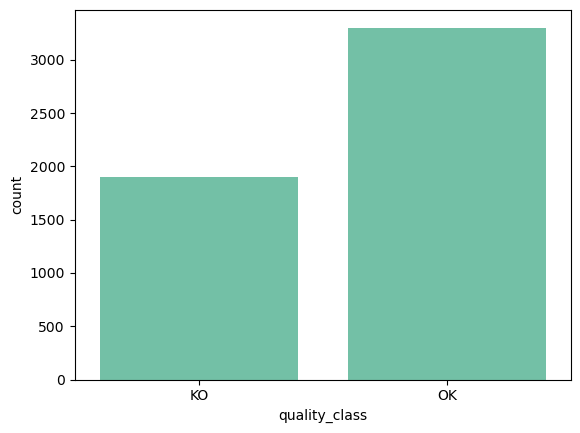

In [23]:
print(learn[target].value_counts())
sns.countplot(data=learn, x=target, color='mediumaquamarine')
plt.show()

From the countplot, it becomes clear that our target contais more *OK* observations (3302) than *KO* (1897), meaning the classes are not equally represented (the **dataset is imbalanced**). If this imbalance is not accounted for, the model may become biased towards the majority class, leading to poor performance on the minority class, even if the overall accuracy appears to be high.

**Step 8**: Check the distribution of each numerical feature.

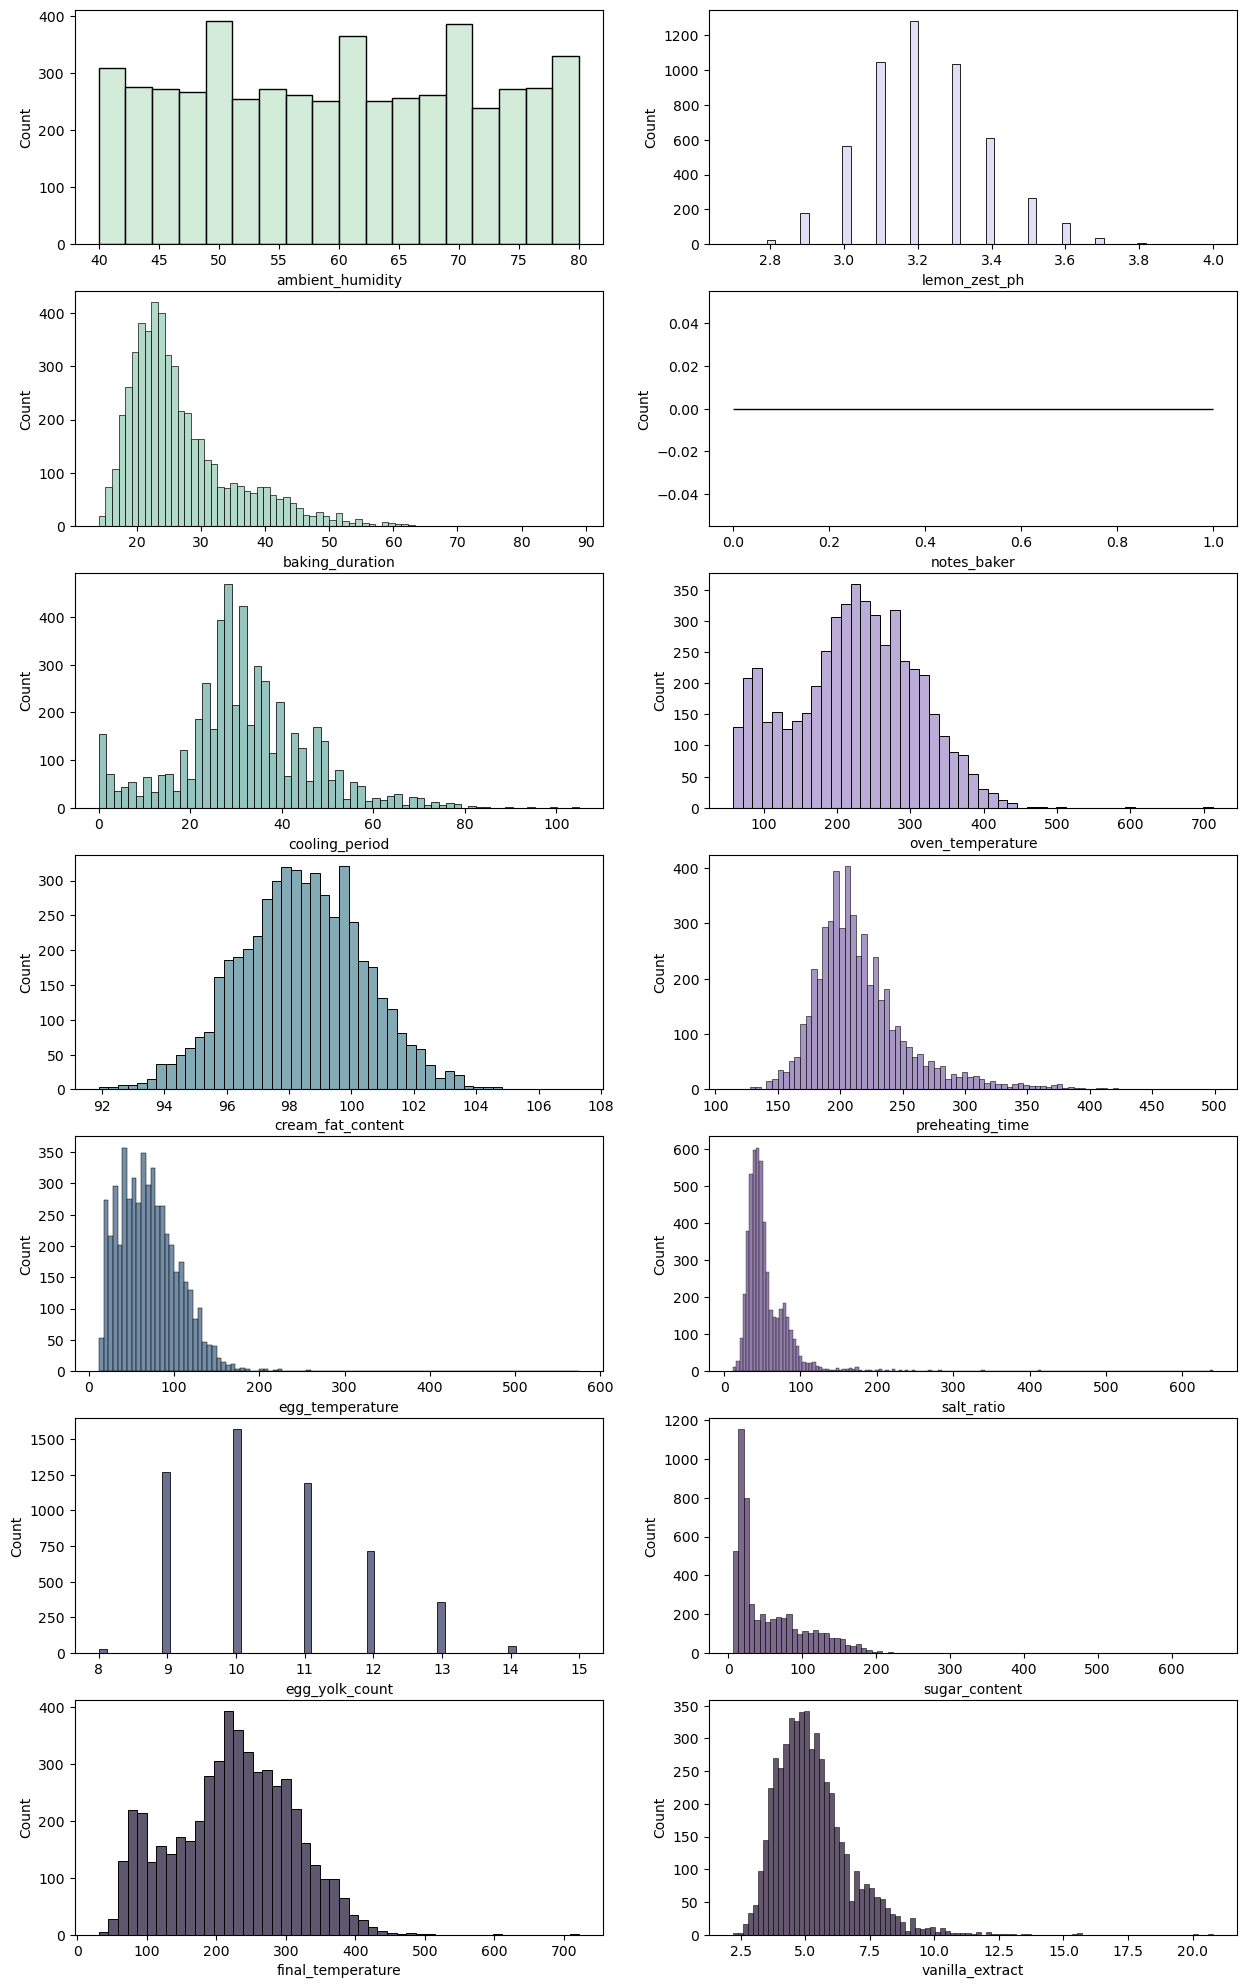

In [24]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,25))
for i in range(7):
    numb_variable=numerical_features_list[i]
    sns.histplot(data=learn, x=numb_variable, ax=axes[i][0], color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i])
    axes[i][0].set_xlabel(numb_variable)

    numb_variable=numerical_features_list[i+7]
    sns.histplot(data=learn, x=numb_variable, ax=axes[i][1], color=sns.cubehelix_palette(start=.3, rot=-.1, n_colors=7)[i])
    axes[i][1].set_xlabel(numb_variable)

- `ambient_humidity` shows a relatively uniform distribution
- `lemon_zest_ph` (????), `cream_fat_content` and `cooling_period`: bell-shaped, normal distributions
- `baking_duration`, `preheating_time`, `salt_ratio` and `sugar_content`: right-skewed distributions
- `egg_yolk_count`: multimodal, discrete distribution

**Step 9**: Normalize the categorical features (strip of any uncessary white spaces and converting to lower case) and check the distribution of each one.

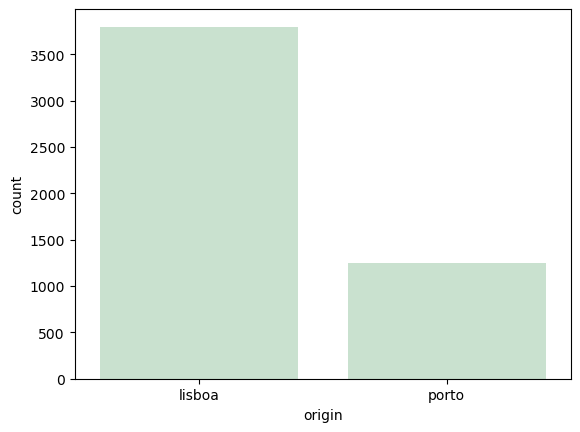

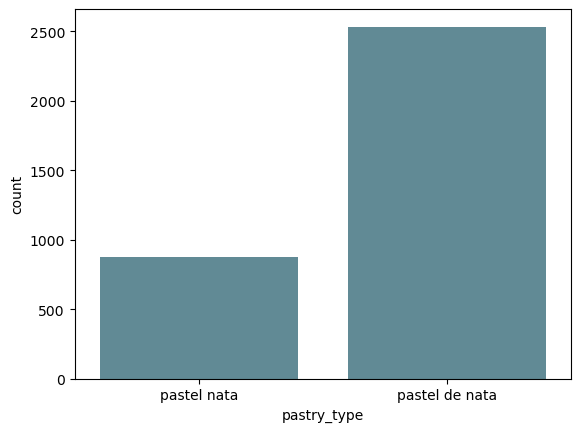

In [25]:
for variable in categorical_features:
    learn[variable] = learn[variable].str.strip().str.lower()
for i in range(len(categorical_features_list)):
    fig = plt.subplots(1,1)
    sns.countplot(data=learn, x=categorical_features_list[i], color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=3)[i])

By analysing the graphs, it becomes evident that there are more Pastéis de Nata from Lisboa then from Porto in the dataset. However, regarding `pastry_type`, it becomes clear that the apparent dominance of the class "pastel de nata" over "pastel nata" is due to data inconsistencies (both refer to the same pastry but have different labels). While this problem could be solved by standardizing the labels, this project focuses solely on classifying Pastéis de Nata and so the variable `pastry_type` might not be necessary for this analysis.

**Step 10**: Compute the correlation between the features and the target. In this step, it is crucial to note that the categorical features (`origin` and `pastry_type`) and the target variable (`quality_class`) will have to be binary encoded (since there are only 2 categories for each variable) - either 0 or 1 - in order to execute the `corr()` method, since correlation is only done with numeric values.

**10.1**: Encode the categorical variables.

In [26]:
learn_encoded = learn.copy() # a copy of the learn DataFrame was created because the original columns will still be needed later on this notebook
learn['origin_encoded'] = learn['origin'].map({'lisboa': 0, 'porto': 1})
learn['pastry_encoded'] = learn['pastry_type'].map({'pastel nata': 0, 'pastel de nata': 1})
learn['target_encoded'] = learn['quality_class'].map({'KO': 0, 'OK': 1})
learn_encoded = learn_encoded.drop(columns = ["origin", "pastry_type", "quality_class"], axis = 1)

**10.2**: Compute the correlation between the variables and display a correlation heatmap of the features.

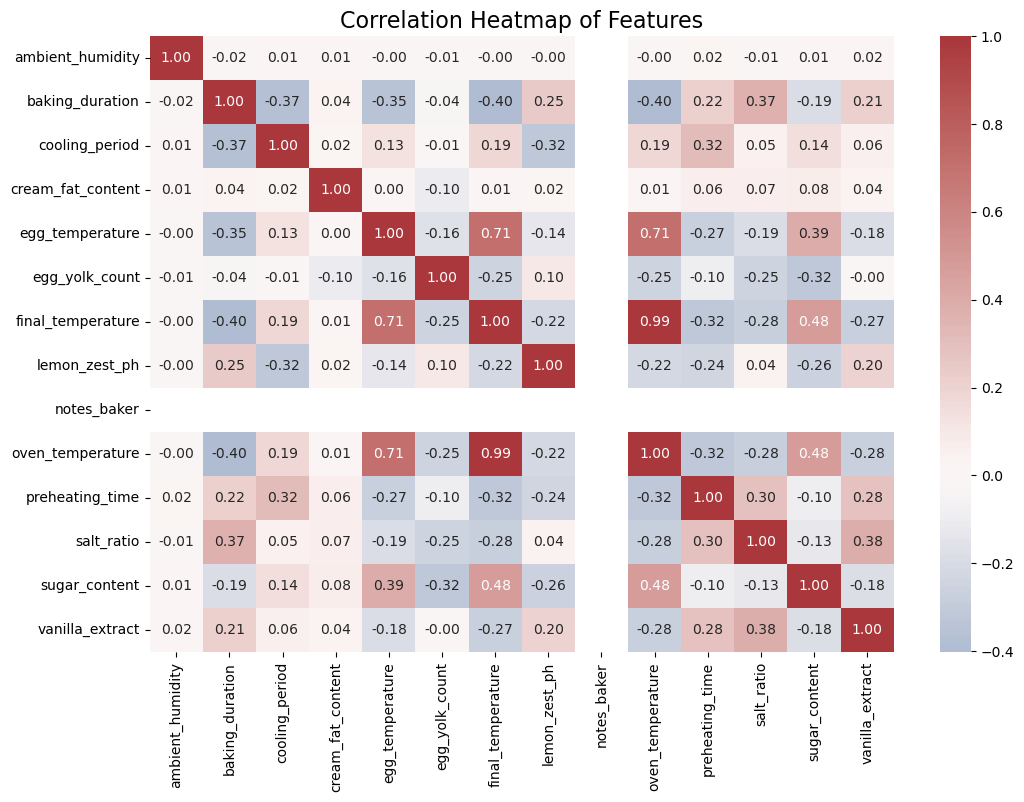

In [27]:
correlation = learn_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation, 
    annot=True, # so the correlation values appear     
    fmt=".2f", # 2 decimal places        
    cmap="vlag",   
    center=0, # the mid-point for the colour scale is a correlation of 0, meaning corr > 0 is red and corr < 0 is blue  
)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

Looking at the correlation heatmap, it is clear that:
- `oven_temperature` and `final_temperature` are very strongly positively correlated - almost perfectly (0.99);
- `egg_temperature` and `oven_temperature` are strongly positively correlated (0.71);
- `baking_duration` and `origin` are moderately positively correlated (0.65);
- `oven_temperature` and `origin` are strongly negatively correlated (-0.70);
- `final_temperature` and `origin` are moderately negatively correlated (-0.69);
- the variable more correlated with the target (`quality_class`) is `egg_yolk_count` with a correlation of 0.38.

**Step 11**: Compare the distributions of each feature across the 2 categories of the target variable (**OK** and **KO**). 

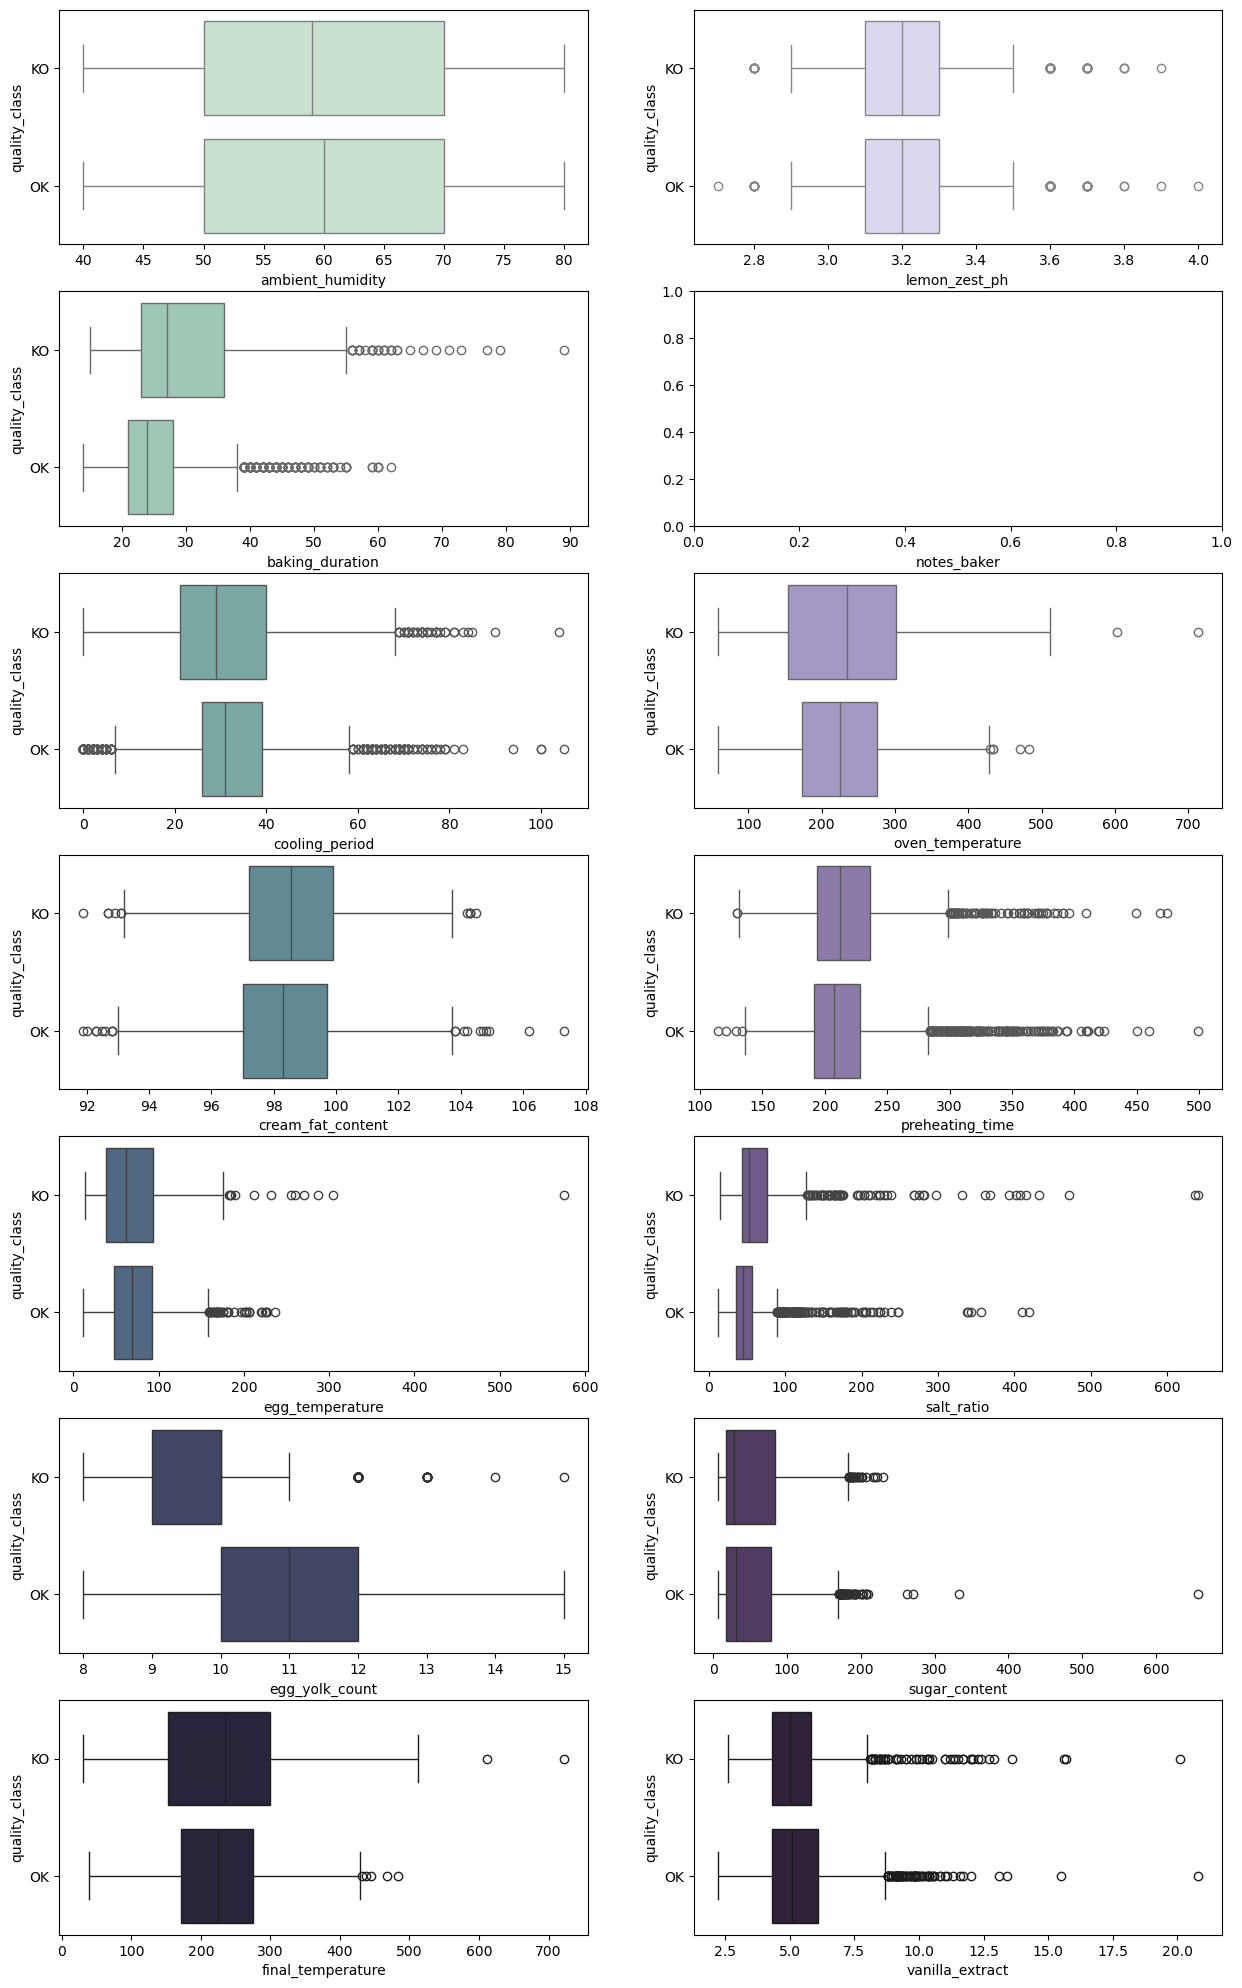

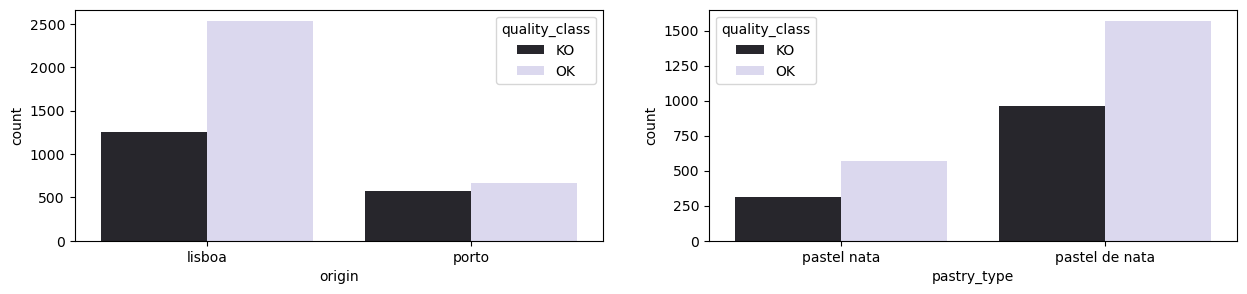

In [28]:
# numerical variables
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,25))
for i in range(7):
    numb_variable=numerical_features_list[i] 
    sns.boxplot(data=learn, x=numb_variable, y=target, ax=axes[i][0], color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i])
    axes[i][0].set_xlabel(numb_variable)

    numb_variable=numerical_features_list[i+7]
    if not learn[numb_variable].value_counts().empty: # notes_baker is empty so plotting on that series returns an error
        sns.boxplot(data=learn, x=numb_variable, y=target, ax=axes[i][1], color=sns.cubehelix_palette(start=.3, rot=-.1, n_colors=7)[i])
    axes[i][1].set_xlabel(numb_variable)

# categorical variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
for i in range(2):
    cat_variable=categorical_features_list[i]
    sns.countplot(data=learn[~learn[cat_variable].isna()], x=cat_variable, hue=target, 
                  ax=axes[i], color=sns.cubehelix_palette(start=.3, rot=-.1, n_colors=2)[0])
    axes[i].set_xlabel(cat_variable)

By analysing the graphs above, it is evident that:
- `ambient_humidity`: the median is slightly higher in the OK class, however, the difference is almost minimal which might suggest that this feature does not strongly influence the predictive power of the model;
- `lemon_zest_ph`: the distribution for both classes is pretty similar, indicating this variable might not have a strong influence when differentiating between KO and OK Pastéis de Nata;
- `baking_duration`: median and range values higher for KO, suggesting over-baking might lead to worse Pastéis de Nata;
- `cooling_period`: 
- `oven_temperature`:
- `cream_fat_content`:
- `preheating_time`:
- `egg_temperature`:
- `salt_ratio`:
- `egg_yolk_count`: more egg yolks provide better results (higher values are more associated with the OK class);
- `sugar_content`:
- `final_temperature`:
- `vanilla_extract`:
- `origin`: Lisboa produced more Pastéis de Nata than Porto and also achieved more high-quality ones (OK), suggesting that Pastéis de Nata from Lisboa tend to be, in most cases, better that Porto's.